In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.colors as mcolors
from scipy import interpolate
from scipy.ndimage import gaussian_filter1d

In [26]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

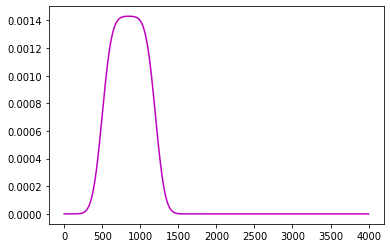

In [75]:
# test_time = np.arange(0,40)
# linear = np.linspace(0,5, 3)
linear = np.linspace(0,x_k_dot_final, (round(t_length*(t_constant/t_final))-500) ) 
x_k_dot = np.concatenate((np.zeros(500), linear, x_k_dot_final*np.ones(4000-1200)))   
# print(linear)
# test_vel = np.concatenate((np.zeros(5), linear, (5*np.ones(40-8))))
# print(len(test_time),test_time)
v1 = gaussian_filter1d(x_k_dot,100)
a1 = np.gradient(v1)
plt.plot(x_k_dot,colors[2])
plt.plot(v1, colors[3])
plt.plot(a1, colors[4])

700


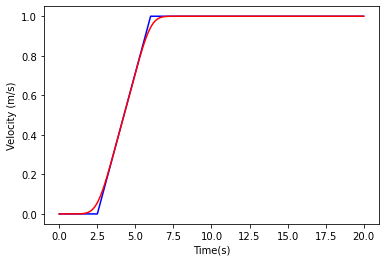

In [80]:
# % VELOCITY PROFILE GENERATION
x_k_dot_final = 1                                                      # Final ball-bot velocity (m/s)
t_final = 20                                                           # Duration of the simulation (s)
t_constant = 6 # Ramp lasts from 2.5 s to t_constant                   # Time to reach constant final velocity (s)
dt = 1/200                                                             # Simulation timestep
t_length = int(t_final/dt)                                             # Length of time vector
t = np.linspace(0, t_final, t_length)                                  # Time vector (s)

print((round(t_length*(t_constant/t_final))-500))
linear = np.linspace(0,x_k_dot_final, (round(t_length*(t_constant/t_final))-500) ) 
x_k_dot = np.concatenate((np.zeros(500), linear, x_k_dot_final*np.ones(4000-1200)))                      # Velocity vector (m/s)
x_k_dot[np.arange(len(x_k_dot),t_length,1)] = x_k_dot_final          # Velocity vector (m/s)

# plt.figure(dpi=300)
plt.plot(t,x_k_dot, colors[0])
plt.xlabel('Time(s)')
plt.ylabel('Velocity (m/s)')
smoothed_velocty = gaussian_filter1d(x_k_dot,100)  #Smoothing velocity with a sigma of 100
plt.plot(t,smoothed_velocty,colors[2])
plt.show()


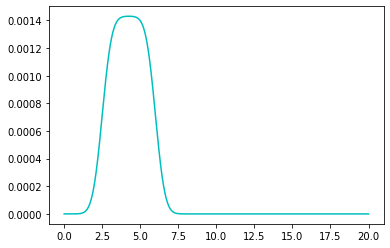

In [81]:
acceleration = np.gradient(smoothed_velocty)
plt.plot(t,acceleration,colors[3])